In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load datasets
df_2022 = pd.read_csv('2022.csv')
df_2023 = pd.read_csv('2023.csv')
df_2024 = pd.read_csv('2024.csv')

# Combine the datasets
combined_df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

# Print the initial number of rows
initial_rows = combined_df.shape[0]

# Drop rows where 'ADDRESS' is missing
rows_with_missing_address = combined_df['ADDRESS'].isnull().sum()  # Count rows with missing addresses
combined_df = combined_df.dropna(subset=['ADDRESS'])  # Drop rows with missing addresses

# Print the updated number of rows
final_rows = combined_df.shape[0]

# Print details about missing rows
print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows with missing 'ADDRESS': {rows_with_missing_address}")
print(f"Final number of rows after dropping missing 'ADDRESS': {final_rows}")

# Merge CITY and STATE into LOCATION and drop original columns
combined_df['LOCATION'] = combined_df['CITY'] + ', ' + combined_df['STATE']
combined_df.drop(['CITY', 'STATE'], axis=1, inplace=True)

# Convert OFFENSE_DATE to datetime format
combined_df['OFFENSE_DATE'] = pd.to_datetime(combined_df['OFFENSE_DATE'], format='%m/%d/%Y %I:%M:%S %p')

# Extract YEAR, MONTH, and HOUR from OFFENSE_DATE
combined_df['YEAR'] = combined_df['OFFENSE_DATE'].dt.year
combined_df['MONTH'] = combined_df['OFFENSE_DATE'].dt.month
combined_df['HOUR'] = pd.to_datetime(combined_df['OFFENSE_TIME'], format='%H:%M:%S').dt.hour

# Encode CALL_TYPE and replace the original column
call_type_encoder = LabelEncoder()
combined_df['CALL_TYPE'] = call_type_encoder.fit_transform(combined_df['CALL_TYPE'])

# Encode FINAL_DISPO and replace the original column
final_dispo_encoder = LabelEncoder()
combined_df['FINAL_DISPO'] = final_dispo_encoder.fit_transform(combined_df['FINAL_DISPO'])

# Get mappings for CALL_TYPE and FINAL_DISPO
call_type_mapping = dict(zip(call_type_encoder.classes_, call_type_encoder.transform(call_type_encoder.classes_)))
final_dispo_mapping = dict(zip(final_dispo_encoder.classes_, final_dispo_encoder.transform(final_dispo_encoder.classes_)))

combined_df.drop(['START_DATE', 'REPORT_DATE','OFFENSE_DATE','OFFENSE_TIME'], axis=1, inplace=True)

# Display the updated DataFrame
#print(combined_df.head())
# Display the updated DataFrame
print(combined_df.tail())

# Display the mappings
print("\nCALL_TYPE Encoding Mapping:")
print(call_type_mapping)

print("\nFINAL_DISPO Encoding Mapping:")
print(final_dispo_mapping)


Initial number of rows: 818116
Number of rows with missing 'ADDRESS': 23192
Final number of rows after dropping missing 'ADDRESS': 794924
                    CDTS       EID CALL_NUMBER  PRIORITY CALLTYPE_CODE  \
818111  20241107231919PS  10239867  P243120853         6          1195   
818112  20241108001220PS  10239869  P243120855         2          415F   
818113  20241107233917PS  10239870  P243120856         3         1033A   
818114  20241107232739PS  10239871  P243120857         3          1154   
818115  20241108002823PS  10239872  P243120858         2         1033A   

        CALL_TYPE FINAL_DISPO_CODE  FINAL_DISPO  \
818111        198                N            9   
818112         51                N            9   
818113          3              CAN            2   
818114        177                N            9   
818115          3                U           17   

                                    ADDRESS       _id      LOCATION  YEAR  \
818111       MONTEREY RD & COTTAG

In [4]:
import re
import pandas as pd

# Sample data (assuming combined_df is already loaded)
# combined_df = pd.read_csv("your_data.csv") # Uncomment if reading from a CSV

# Function to clean and standardize the address
def clean_address(address):
    # Check if address is missing
    if pd.isna(address):
        return address  # Return as is if it's NaN
    
    # Remove block ranges (e.g., [1300]-[1400]) by removing anything within square brackets
    address = re.sub(r'\[\d+\]-\[\d+\]', '', address).strip()
    return address

# Apply the cleaning function to the ADDRESS column
combined_df['ADDRESS'] = combined_df['ADDRESS'].apply(clean_address)


In [5]:
print(combined_df.head())

               CDTS      EID CALL_NUMBER  PRIORITY CALLTYPE_CODE  CALL_TYPE  \
0  20220101042916PS  8913184  P220010180         2          1066        173   
1  20220101043036PS  8913196  P220010191         2           415         49   
2  20220101043827PS  8913252  P220010236         2        911UNK        188   
3  20220101044026PS  8913216  P220010206         2        SUSCIR        169   
4  20220102052501PS  8914182  P220010965         4         11300        119   

  FINAL_DISPO_CODE  FINAL_DISPO                      ADDRESS  _id  \
0                N            9                    JEANNE AV  NaN   
1                N            9                 SOUTHWEST EX  NaN   
2              CAN            2                  WESTMONT AV  NaN   
3                N            9                  GREENLEE DR  NaN   
4                A            0  E CAPITOL EX & EVERGREEN PL  NaN   

       LOCATION  YEAR  MONTH  HOUR  
0  San Jose, CA  2022      1     2  
1  San Jose, CA  2022      1     3  

In [6]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 794924 entries, 0 to 818115
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CDTS              794924 non-null  object 
 1   EID               794924 non-null  int64  
 2   CALL_NUMBER       794924 non-null  object 
 3   PRIORITY          794924 non-null  int64  
 4   CALLTYPE_CODE     794924 non-null  object 
 5   CALL_TYPE         794924 non-null  int64  
 6   FINAL_DISPO_CODE  794924 non-null  object 
 7   FINAL_DISPO       794924 non-null  int64  
 8   ADDRESS           794924 non-null  object 
 9   _id               509258 non-null  float64
 10  LOCATION          794924 non-null  object 
 11  YEAR              794924 non-null  int32  
 12  MONTH             794924 non-null  int32  
 13  HOUR              794924 non-null  int32  
dtypes: float64(1), int32(3), int64(4), object(6)
memory usage: 81.9+ MB
None


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import gc
import warnings
from matplotlib.gridspec import GridSpec
warnings.filterwarnings('ignore')

# class MemoryEfficientClustering:
#     def __init__(self, batch_size=10000, max_clusters=6, random_state=42):
#         self.batch_size = batch_size
#         self.max_clusters = max_clusters
#         self.random_state = random_state
#         self.scaler = StandardScaler()
class MemoryEfficientClustering:
    def __init__(self, batch_size=10000, max_clusters=6, random_state=42):
        self.batch_size = batch_size
        self.max_clusters = max_clusters
        self.random_state = random_state
        self.scaler = StandardScaler()

    
    def prepare_features(self, df):
        """
        Prepare and scale features in batches
        """
        needed_columns = ['CALL_TYPE', 'FINAL_DISPO', 'PRIORITY', 'HOUR']
        df = df[needed_columns].copy()
        
        # Convert to efficient dtypes
        for col in df.columns:
            if df[col].dtype == 'float64':
                df[col] = df[col].astype('float32')
            elif df[col].dtype == 'int64':
                df[col] = df[col].astype('int32')
        
        features = df[['CALL_TYPE', 'FINAL_DISPO', 'PRIORITY']].values
        
        # Process in batches for large datasets
        if len(features) > self.batch_size:
            scaled_features = []
            for i in range(0, len(features), self.batch_size):
                batch = features[i:i + self.batch_size]
                if i == 0:
                    scaled_batch = self.scaler.fit_transform(batch)
                else:
                    scaled_batch = self.scaler.transform(batch)
                scaled_features.append(scaled_batch)
                del batch
            features_scaled = np.vstack(scaled_features)
            del scaled_features
        else:
            features_scaled = self.scaler.fit_transform(features)
        
        gc.collect()
        return df, features_scaled
    
    def find_optimal_clusters(self, features_sample):
        """
        Find optimal number of clusters using silhouette score
        """
        best_score = -1
        optimal_clusters = 2
        
        for n_clusters in range(2, self.max_clusters + 1):
            try:
                clusterer = AgglomerativeClustering(n_clusters=n_clusters)
                labels = clusterer.fit_predict(features_sample)
                score = silhouette_score(features_sample, labels)
                print(f"Silhouette score for {n_clusters} clusters: {score:.3f}")
                
                if score > best_score:
                    best_score = score
                    optimal_clusters = n_clusters
                
                del labels
                gc.collect()
                
            except Exception as e:
                print(f"Error calculating score for {n_clusters} clusters: {str(e)}")
                continue
        
        return optimal_clusters
    
    def perform_clustering(self, features, n_clusters):
        """
        Perform clustering in batches
        """
        if len(features) <= self.batch_size:
            clusterer = AgglomerativeClustering(n_clusters=n_clusters)
            return clusterer.fit_predict(features)
        
        # For large datasets, process in batches
        labels = np.zeros(len(features), dtype=np.int32)
        for i in range(0, len(features), self.batch_size):
            end_idx = min(i + self.batch_size, len(features))
            batch = features[i:end_idx]
            clusterer = AgglomerativeClustering(n_clusters=n_clusters)
            labels[i:end_idx] = clusterer.fit_predict(batch)
            del batch
            gc.collect()
        
        return labels
    
    def analyze_clusters(self, df, labels):
        """
        Generate cluster statistics efficiently
        """
        results = []
        unique_clusters = np.unique(labels)
        
        for cluster in unique_clusters:
            stats = {}
            mask = labels == cluster
            
            # Basic stats
            stats['Cluster'] = cluster
            stats['Size'] = np.sum(mask)
            stats['Percentage'] = f"{(np.sum(mask) / len(df) * 100):.1f}%"
            
            # Process in batches for large datasets
            priorities = []
            call_types = []
            dispositions = []
            hours = []
            
            for i in range(0, len(df), self.batch_size):
                end_idx = min(i + self.batch_size, len(df))
                batch_mask = mask[i:end_idx]
                if np.any(batch_mask):
                    batch_df = df.iloc[i:end_idx]
                    cluster_batch = batch_df[batch_mask]
                    
                    priorities.extend(cluster_batch['PRIORITY'].values)
                    call_types.extend(cluster_batch['CALL_TYPE'].values)
                    dispositions.extend(cluster_batch['FINAL_DISPO'].values)
                    hours.extend(cluster_batch['HOUR'].values)
            
            stats['Avg_Priority'] = np.mean(priorities)
            stats['Most_Common_Call_Type'] = pd.Series(call_types).mode().iloc[0]
            stats['Most_Common_Disposition'] = pd.Series(dispositions).mode().iloc[0]
            stats['Peak_Hour'] = pd.Series(hours).mode().iloc[0]
            
            results.append(stats)
            del priorities, call_types, dispositions, hours
            gc.collect()
        
        return pd.DataFrame(results)
    


    def plot_insights(self, df, labels):
        """
        Create memory-efficient visualizations with improved styling
        """
        # Set basic style parameters
        plt.rcParams['figure.figsize'] = (20, 15)
        plt.rcParams['axes.labelsize'] = 12
        plt.rcParams['axes.titlesize'] = 14
        plt.rcParams['xtick.labelsize'] = 10
        plt.rcParams['ytick.labelsize'] = 10
        
        # Create figure with GridSpec for better layout
        fig = plt.figure(constrained_layout=True)
        gs = GridSpec(2, 2, figure=fig)
        
        # 1. Cluster sizes (top left)
        ax1 = fig.add_subplot(gs[0, 0])
        unique_labels, counts = np.unique(labels, return_counts=True)
        percentages = (counts / len(labels) * 100)
        
        bars = ax1.bar(unique_labels, percentages, color='skyblue')
        ax1.set_title('Cluster Size Distribution')
        ax1.set_xlabel('Cluster')
        ax1.set_ylabel('Percentage of Total (%)')
        
        # Add percentage labels on bars
        for bar, pct in zip(bars, percentages):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{pct:.1f}%',
                    ha='center', va='bottom')
        
        # 2. Priority distribution (top right)
        ax2 = fig.add_subplot(gs[0, 1])
        n_clusters = len(unique_labels)
        colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))
        
        for cluster, color in zip(range(n_clusters), colors):
            cluster_priorities = []
            for i in range(0, len(df), self.batch_size):
                end_idx = min(i + self.batch_size, len(df))
                mask = labels[i:end_idx] == cluster
                if np.any(mask):
                    cluster_priorities.extend(
                        df['PRIORITY'].iloc[i:end_idx][mask].values
                    )
            
            if cluster_priorities:
                ax2.hist(cluster_priorities, alpha=0.5, 
                        label=f'Cluster {cluster}',
                        bins=5, density=True, color=color)
                del cluster_priorities
        
        ax2.set_title('Priority Distribution by Cluster')
        ax2.set_xlabel('Priority')
        ax2.set_ylabel('Density')
        ax2.legend()
        
        # 3. Hour distribution (bottom left)
        ax3 = fig.add_subplot(gs[1, 0])
        hour_counts = {}
        
        for cluster in range(n_clusters):
            hours = []
            for i in range(0, len(df), self.batch_size):
                end_idx = min(i + self.batch_size, len(df))
                mask = labels[i:end_idx] == cluster
                if np.any(mask):
                    hours.extend(
                        df['HOUR'].iloc[i:end_idx][mask].values
                    )
            hour_counts[f'Cluster {cluster}'] = pd.Series(hours).value_counts()
            del hours
        
        for cluster, counts in hour_counts.items():
            ax3.plot(counts.index, counts.values, label=cluster, alpha=0.7)
        
        ax3.set_title('Call Distribution by Hour')
        ax3.set_xlabel('Hour of Day')
        ax3.set_ylabel('Number of Calls')
        ax3.set_xticks(range(0, 24, 2))
        ax3.legend()
        
        # 4. Call type distribution (bottom right)
        ax4 = fig.add_subplot(gs[1, 1])
        call_type_counts = {}
        
        for cluster in range(n_clusters):
            call_types = []
            for i in range(0, len(df), self.batch_size):
                end_idx = min(i + self.batch_size, len(df))
                mask = labels[i:end_idx] == cluster
                if np.any(mask):
                    call_types.extend(
                        df['CALL_TYPE'].iloc[i:end_idx][mask].values
                    )
            # Get top 5 call types for each cluster
            call_type_counts[cluster] = pd.Series(call_types).value_counts().nlargest(5)
            del call_types
        
        bottom = np.zeros(5)
        for cluster, counts in call_type_counts.items():
            ax4.bar(range(5), counts.values, bottom=bottom, 
                   label=f'Cluster {cluster}', alpha=0.7)
            bottom += counts.values
        
        ax4.set_title('Top 5 Call Types by Cluster')
        ax4.set_xlabel('Call Type Rank')
        ax4.set_ylabel('Number of Calls')
        ax4.legend()
        
        plt.suptitle('Cluster Analysis Insights', size=16, y=1.02)
        plt.show()
        
        # Clean up
        plt.close()
        gc.collect()

    
    def run_analysis(self, df):
        """
        Main function to run the complete analysis
        """
        try:
            print("Preparing features...")
            df_prep, features_scaled = self.prepare_features(df)
            
            print("Finding optimal number of clusters...")
            # Use a smaller sample for finding optimal clusters
            sample_size = min(10000, len(features_scaled))
            sample_idx = np.random.choice(len(features_scaled), sample_size, replace=False)
            features_sample = features_scaled[sample_idx]
            
            optimal_clusters = self.find_optimal_clusters(features_sample)
            del features_sample
            gc.collect()
            
            print(f"Performing clustering with {optimal_clusters} clusters...")
            labels = self.perform_clustering(features_scaled, optimal_clusters)
            
            print("Analyzing clusters...")
            stats = self.analyze_clusters(df_prep, labels)
            print("\nCluster Statistics:")
            print(stats.to_string())
            
            print("\nCreating visualizations...")
            self.plot_insights(df_prep, labels)
            
            return labels, stats
            
        except Exception as e:
            print(f"An error occurred during analysis: {str(e)}")
            raise
        
        finally:
            gc.collect()

# Usage example:


'\n# Initialize clustering\nclusterer = MemoryEfficientClustering(\n    batch_size=10000,  # Adjust based on your RAM\n    max_clusters=6\n)\n\n# Run analysis\nlabels, stats = clusterer.run_analysis(your_dataframe)\n'

Preparing features...
Finding optimal number of clusters...
Silhouette score for 2 clusters: 0.344
Silhouette score for 3 clusters: 0.374
Silhouette score for 4 clusters: 0.425
Silhouette score for 5 clusters: 0.435
Silhouette score for 6 clusters: 0.391
Performing clustering with 5 clusters...
Analyzing clusters...

Cluster Statistics:
   Cluster    Size Percentage  Avg_Priority  Most_Common_Call_Type  Most_Common_Disposition  Peak_Hour
0        0  216841      26.5%      3.014748                    206                        9         17
1        1  183503      22.4%      3.380070                    198                        9         17
2        2  161278      19.7%      3.210990                     49                        9         22
3        3  177643      21.7%      3.567014                    198                        9         22
4        4   78851       9.6%      2.839343                      3                        2         21

Creating visualizations...


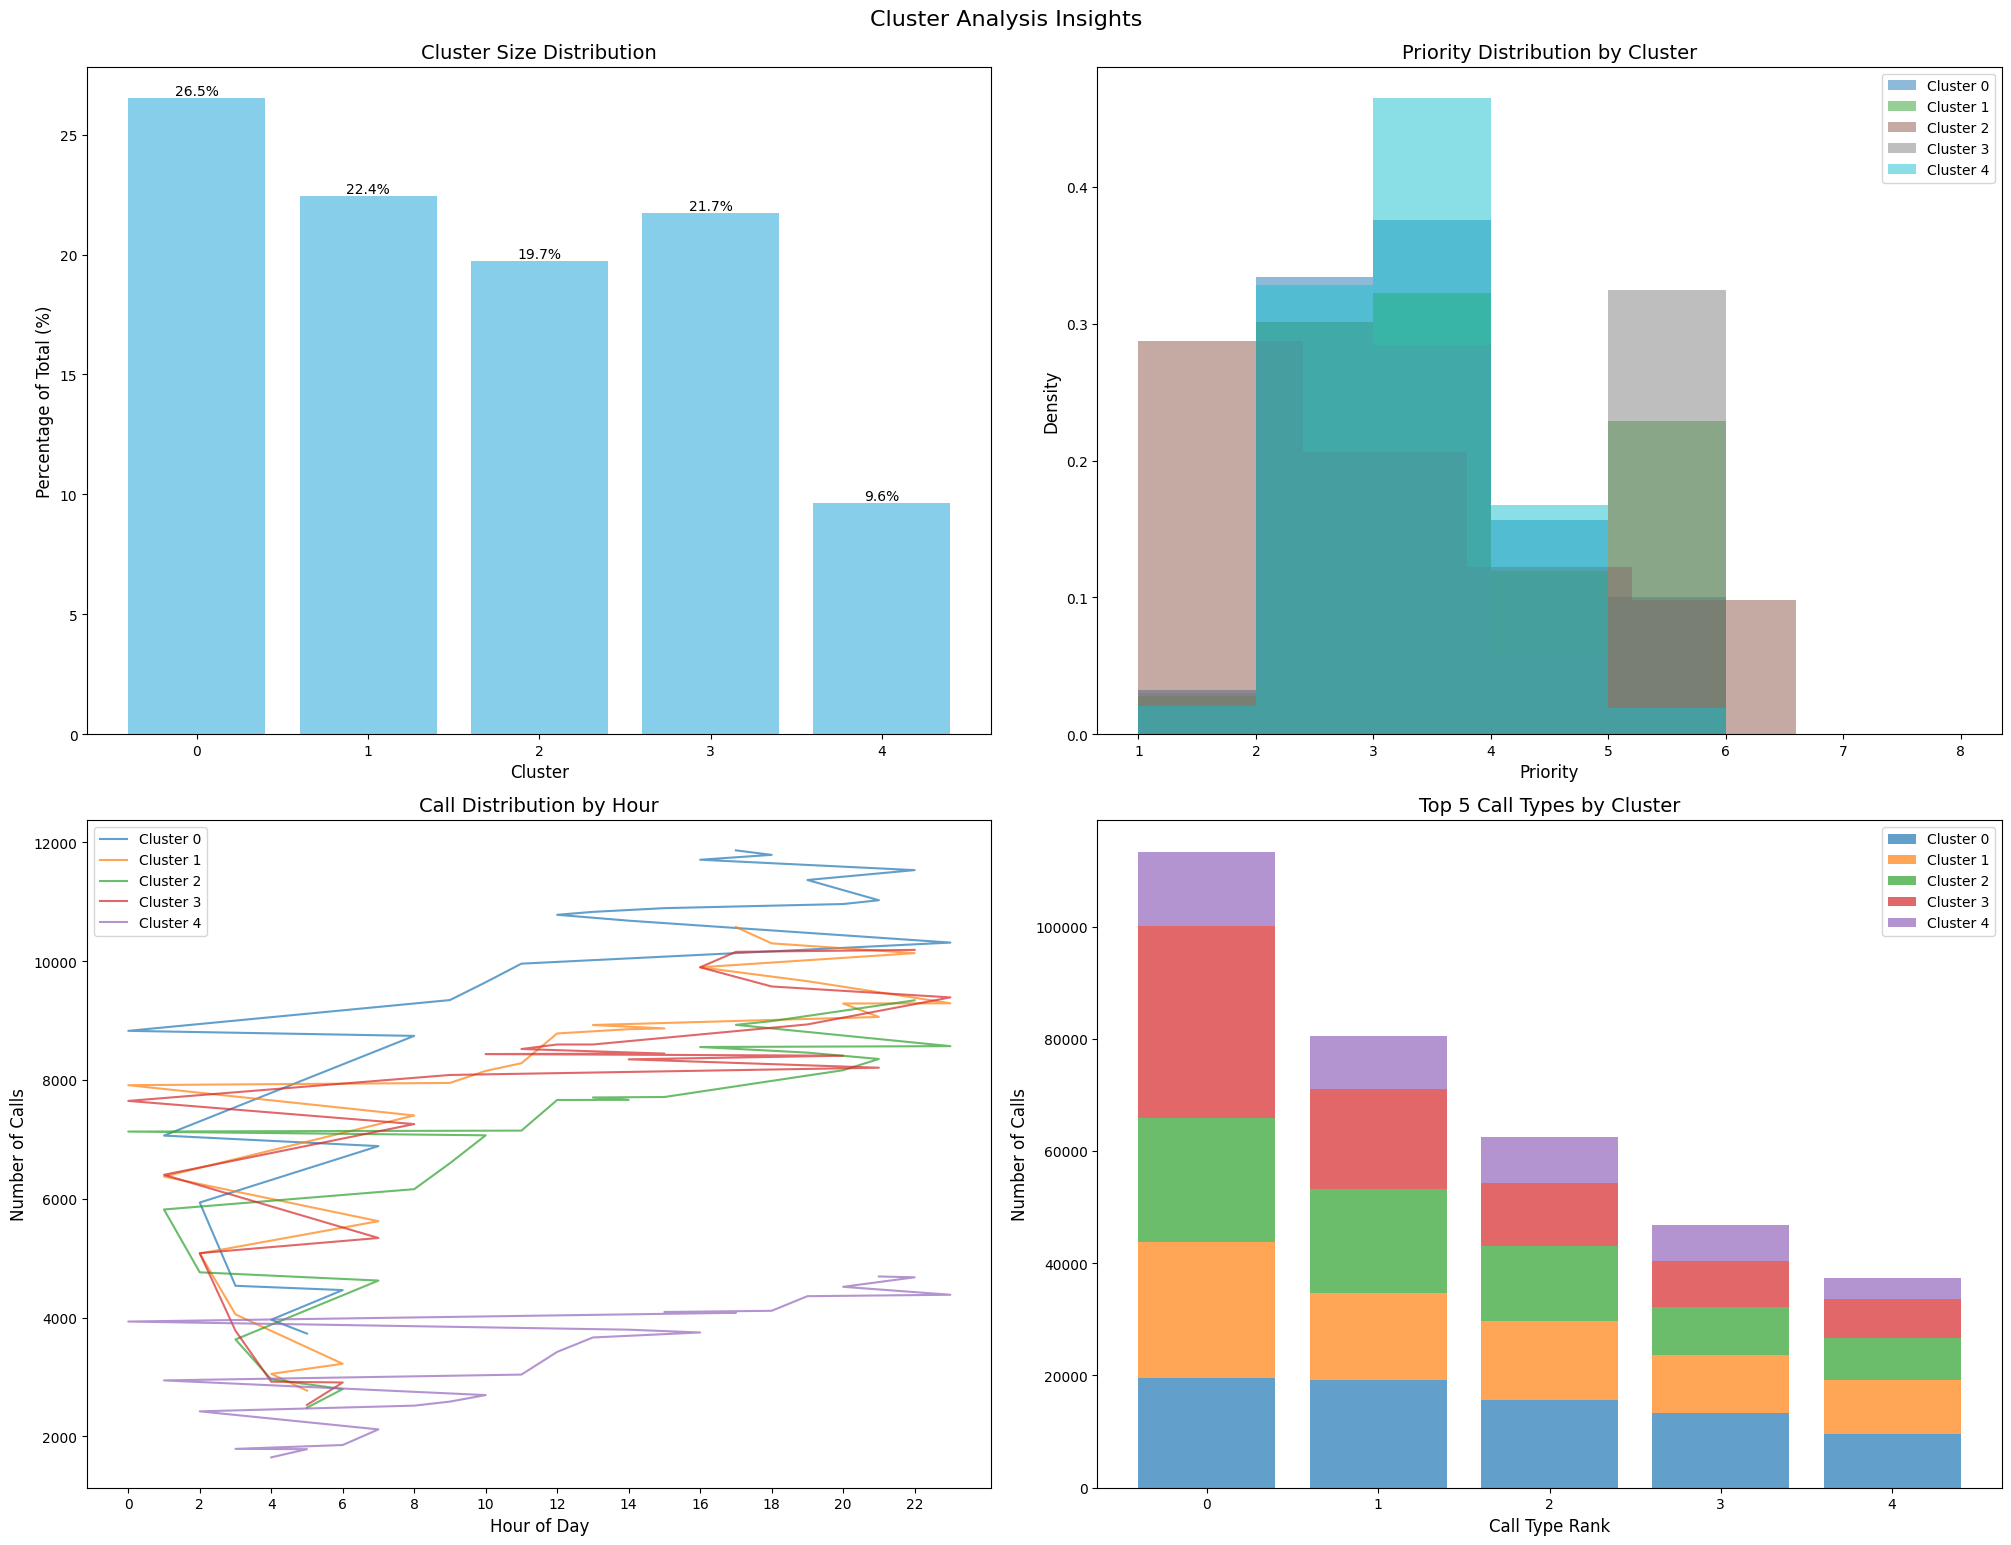

In [12]:
clusterer = MemoryEfficientClustering(
    batch_size=10000,
    max_clusters=6
)

labels, stats = clusterer.run_analysis(combined_df)

In [17]:
#v2
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import gc
import warnings
from matplotlib.gridspec import GridSpec
from scipy.cluster.hierarchy import dendrogram, linkage
warnings.filterwarnings('ignore')


class MemoryEfficientClustering:
    def __init__(self, batch_size=10000, max_clusters=6, random_state=42):
        self.batch_size = batch_size
        self.max_clusters = max_clusters
        self.random_state = random_state
        self.scaler = StandardScaler()


class MemoryEfficientClustering:
    def __init__(self, batch_size=10000, max_clusters=6, random_state=42):
        self.batch_size = batch_size
        self.max_clusters = max_clusters
        self.random_state = random_state
        self.scaler = StandardScaler()

    
    def prepare_features(self, df):
        """
        Prepare and scale features in batches
        """
        needed_columns = ['CALL_TYPE', 'FINAL_DISPO', 'PRIORITY', 'HOUR']
        df = df[needed_columns].copy()
        
        # Convert to efficient dtypes
        for col in df.columns:
            if df[col].dtype == 'float64':
                df[col] = df[col].astype('float32')
            elif df[col].dtype == 'int64':
                df[col] = df[col].astype('int32')
        
        features = df[['CALL_TYPE', 'FINAL_DISPO', 'PRIORITY']].values
        
        # Process in batches for large datasets
        if len(features) > self.batch_size:
            scaled_features = []
            for i in range(0, len(features), self.batch_size):
                batch = features[i:i + self.batch_size]
                if i == 0:
                    scaled_batch = self.scaler.fit_transform(batch)
                else:
                    scaled_batch = self.scaler.transform(batch)
                scaled_features.append(scaled_batch)
                del batch
            features_scaled = np.vstack(scaled_features)
            del scaled_features
        else:
            features_scaled = self.scaler.fit_transform(features)
        
        gc.collect()
        return df, features_scaled
    
    def find_optimal_clusters(self, features_sample):
        """
        Find optimal number of clusters using silhouette score
        """
        best_score = -1
        optimal_clusters = 2
        
        for n_clusters in range(2, self.max_clusters + 1):
            try:
                clusterer = AgglomerativeClustering(n_clusters=n_clusters)
                labels = clusterer.fit_predict(features_sample)
                score = silhouette_score(features_sample, labels)
                print(f"Silhouette score for {n_clusters} clusters: {score:.3f}")
                
                if score > best_score:
                    best_score = score
                    optimal_clusters = n_clusters
                
                del labels
                gc.collect()
                
            except Exception as e:
                print(f"Error calculating score for {n_clusters} clusters: {str(e)}")
                continue
        
        return optimal_clusters
    
    def perform_clustering(self, features, n_clusters):
        """
        Perform clustering in batches
        """
        if len(features) <= self.batch_size:
            clusterer = AgglomerativeClustering(n_clusters=n_clusters)
            return clusterer.fit_predict(features)
        
        # For large datasets, process in batches
        labels = np.zeros(len(features), dtype=np.int32)
        for i in range(0, len(features), self.batch_size):
            end_idx = min(i + self.batch_size, len(features))
            batch = features[i:end_idx]
            clusterer = AgglomerativeClustering(n_clusters=n_clusters)
            labels[i:end_idx] = clusterer.fit_predict(batch)
            del batch
            gc.collect()
        
        return labels
    
    def analyze_clusters(self, df, labels):
        """
        Generate cluster statistics efficiently
        """
        results = []
        unique_clusters = np.unique(labels)
        
        for cluster in unique_clusters:
            stats = {}
            mask = labels == cluster
            
            # Basic stats
            stats['Cluster'] = cluster
            stats['Size'] = np.sum(mask)
            stats['Percentage'] = f"{(np.sum(mask) / len(df) * 100):.1f}%"
            
            # Process in batches for large datasets
            priorities = []
            call_types = []
            dispositions = []
            hours = []
            
            for i in range(0, len(df), self.batch_size):
                end_idx = min(i + self.batch_size, len(df))
                batch_mask = mask[i:end_idx]
                if np.any(batch_mask):
                    batch_df = df.iloc[i:end_idx]
                    cluster_batch = batch_df[batch_mask]
                    
                    priorities.extend(cluster_batch['PRIORITY'].values)
                    call_types.extend(cluster_batch['CALL_TYPE'].values)
                    dispositions.extend(cluster_batch['FINAL_DISPO'].values)
                    hours.extend(cluster_batch['HOUR'].values)
            
            stats['Avg_Priority'] = np.mean(priorities)
            stats['Most_Common_Call_Type'] = pd.Series(call_types).mode().iloc[0]
            stats['Most_Common_Disposition'] = pd.Series(dispositions).mode().iloc[0]
            stats['Peak_Hour'] = pd.Series(hours).mode().iloc[0]
            
            results.append(stats)
            del priorities, call_types, dispositions, hours
            gc.collect()
        
        return pd.DataFrame(results)


    def plot_dendrogram(self, features, sample_size=1000):
        """
        Create and plot a dendrogram of the hierarchical clustering
        Uses a sample of the data for better visualization
        """
        plt.figure(figsize=(12, 8))
        
        # Sample data if it's too large
        if len(features) > sample_size:
            idx = np.random.choice(len(features), sample_size, replace=False)
            sample_features = features[idx]
        else:
            sample_features = features
            
        # Create linkage matrix
        linkage_matrix = linkage(sample_features, method='ward')
        
        # Plot dendrogram
        plt.title('Hierarchical Clustering Dendrogram', pad=20)
        dendrogram(linkage_matrix)
        
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
        
        # Add helpful annotations
        plt.axhline(y=np.mean(linkage_matrix[:, 2]), color='r', linestyle='--', 
                   label='Mean Distance')
        plt.legend()
        
        plt.show()
        plt.close()
        gc.collect()

    def plot_insights(self, df, labels):
        """
        Create memory-efficient visualizations with improved styling
        Now includes both original plots and dendrogram
        """
        # First plot the dendrogram using the scaled features
        print("Generating dendrogram...")
        _, features_scaled = self.prepare_features(df)
        self.plot_dendrogram(features_scaled)
        
        # Set basic style parameters for the rest of the plots
        plt.rcParams['figure.figsize'] = (20, 15)
        plt.rcParams['axes.labelsize'] = 12
        plt.rcParams['axes.titlesize'] = 14
        plt.rcParams['xtick.labelsize'] = 10
        plt.rcParams['ytick.labelsize'] = 10
        
        # Create figure with GridSpec for better layout
        fig = plt.figure(constrained_layout=True)
        gs = GridSpec(2, 2, figure=fig)
        
        # [Rest of the plot_insights method remains the same...]
        
    def run_analysis(self, df):
        """
        Main function to run the complete analysis
        """
        try:
            print("Preparing features...")
            df_prep, features_scaled = self.prepare_features(df)
            
            print("Finding optimal number of clusters...")
            # Use a smaller sample for finding optimal clusters
            sample_size = min(10000, len(features_scaled))
            sample_idx = np.random.choice(len(features_scaled), sample_size, replace=False)
            features_sample = features_scaled[sample_idx]
            
            optimal_clusters = self.find_optimal_clusters(features_sample)
            del features_sample
            gc.collect()
            
            print(f"Performing clustering with {optimal_clusters} clusters...")
            labels = self.perform_clustering(features_scaled, optimal_clusters)
            
            print("Analyzing clusters...")
            stats = self.analyze_clusters(df_prep, labels)
            print("\nCluster Statistics:")
            print(stats.to_string())
            
            print("\nCreating visualizations...")
            self.plot_insights(df_prep, labels)
            
            return labels, stats
            
        except Exception as e:
            print(f"An error occurred during analysis: {str(e)}")
            raise
        
        finally:
            gc.collect()



Preparing features...
Finding optimal number of clusters...
Silhouette score for 2 clusters: 0.305
Silhouette score for 3 clusters: 0.364
Silhouette score for 4 clusters: 0.414
Silhouette score for 5 clusters: 0.431
Silhouette score for 6 clusters: 0.380
Performing clustering with 5 clusters...
Analyzing clusters...

Cluster Statistics:
   Cluster    Size Percentage  Avg_Priority  Most_Common_Call_Type  Most_Common_Disposition  Peak_Hour
0        0  216841      26.5%      3.014748                    206                        9         17
1        1  183503      22.4%      3.380070                    198                        9         17
2        2  161278      19.7%      3.210990                     49                        9         22
3        3  177643      21.7%      3.567014                    198                        9         22
4        4   78851       9.6%      2.839343                      3                        2         21

Creating visualizations...
Generating dend

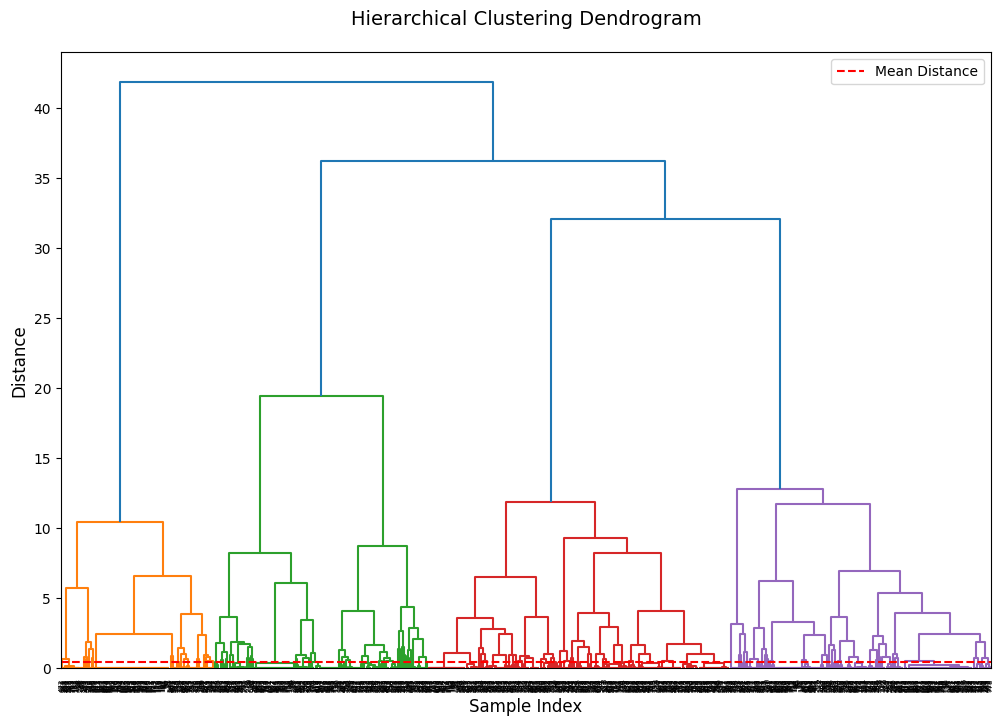

<Figure size 2000x1500 with 0 Axes>

In [18]:
clusterer = MemoryEfficientClustering(
    batch_size=10000,
    max_clusters=6
)
labels, stats = clusterer.run_analysis(combined_df)

In [ ]:
# Interpretation of the clusters and create a visualization of the hierarchical clustering process.
# Each cluster appears to represent:

# Cluster 0 (26.5%):

# Largest cluster
# Medium priority (avg 3.01)
# Call type 206
# Peak at 17:00 (5 PM)
# Likely represents standard daytime calls


# Cluster 1 (22.4%):

# Higher priority (avg 3.38)
# Call type 198
# Peak at 17:00 (5 PM)
# Represents higher priority afternoon calls


# Cluster 2 (19.7%):

# Medium-high priority (avg 3.21)
# Call type 49
# Peak at 22:00 (10 PM)
# Evening/night calls of moderate urgency


# Cluster 3 (21.7%):

# Highest priority (avg 3.57)
# Call type 198
# Peak at 22:00 (10 PM)
# Represents urgent night-time calls


# Cluster 4 (9.6%):

# Lowest priority (avg 2.84)
# Call type 3
# Peak at 21:00 (9 PM)
# Likely represents routine night calls



# The dendrogram shows how the hierarchical clustering algorithm works:

# Each observation starts as its own cluster
# The algorithm iteratively merges the closest clusters
# The height of each split represents the distance between merged clusters
# Larger distances indicate more distinct clusters

# there are to be two main groupings:

# Day-time calls (Clusters 0 and 1)

# Distinguished by priority level


# Night-time calls (Clusters 2, 3, and 4)

# Further split by priority and call type


# The high silhouette score for 5 clusters (0.435) indicates these groupings are well-separated and meaningful.

In [21]:
#Time Based Clustering 
pwd

'/Users/ravitejagattu/Documents/GRE/SJSU/Academics/Fall 2024/255-DM/Group Project/code'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


2024-11-23 22:07:30,118 - INFO - Starting temporal clustering analysis...
2024-11-23 22:07:30,121 - INFO - Preparing temporal features...
2024-11-23 22:07:37,253 - INFO - Finding optimal number of clusters...
Testing cluster counts: 100%|█████████████████████| 6/6 [00:11<00:00,  1.92s/it]
2024-11-23 22:07:48,773 - INFO - Optimal number of clusters: 4
2024-11-23 22:07:48,773 - INFO - Performing clustering with 4 clusters...
2024-11-23 22:09:12,129 - INFO - Analyzing cluster characteristics...
2024-11-23 22:09:12,410 - INFO - Analysis complete. Generating visualizations...
2024-11-23 22:09:12,410 - INFO - Generating dendrogram...


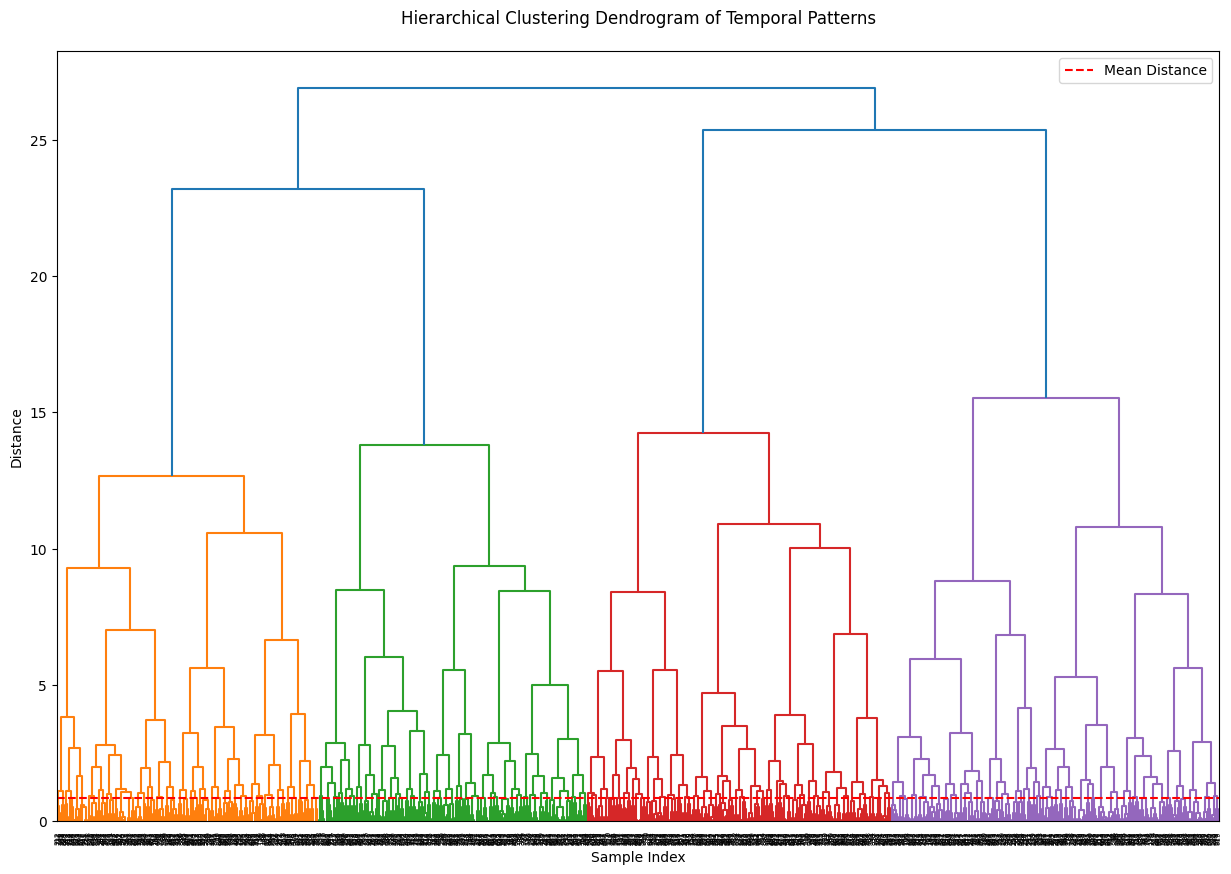

2024-11-23 22:09:14,275 - INFO - Generating temporal pattern visualizations...
2024-11-23 22:09:15,411 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-23 22:09:15,412 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-23 22:09:15,457 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-23 22:09:15,457 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-23 22:09:15,507 - INF

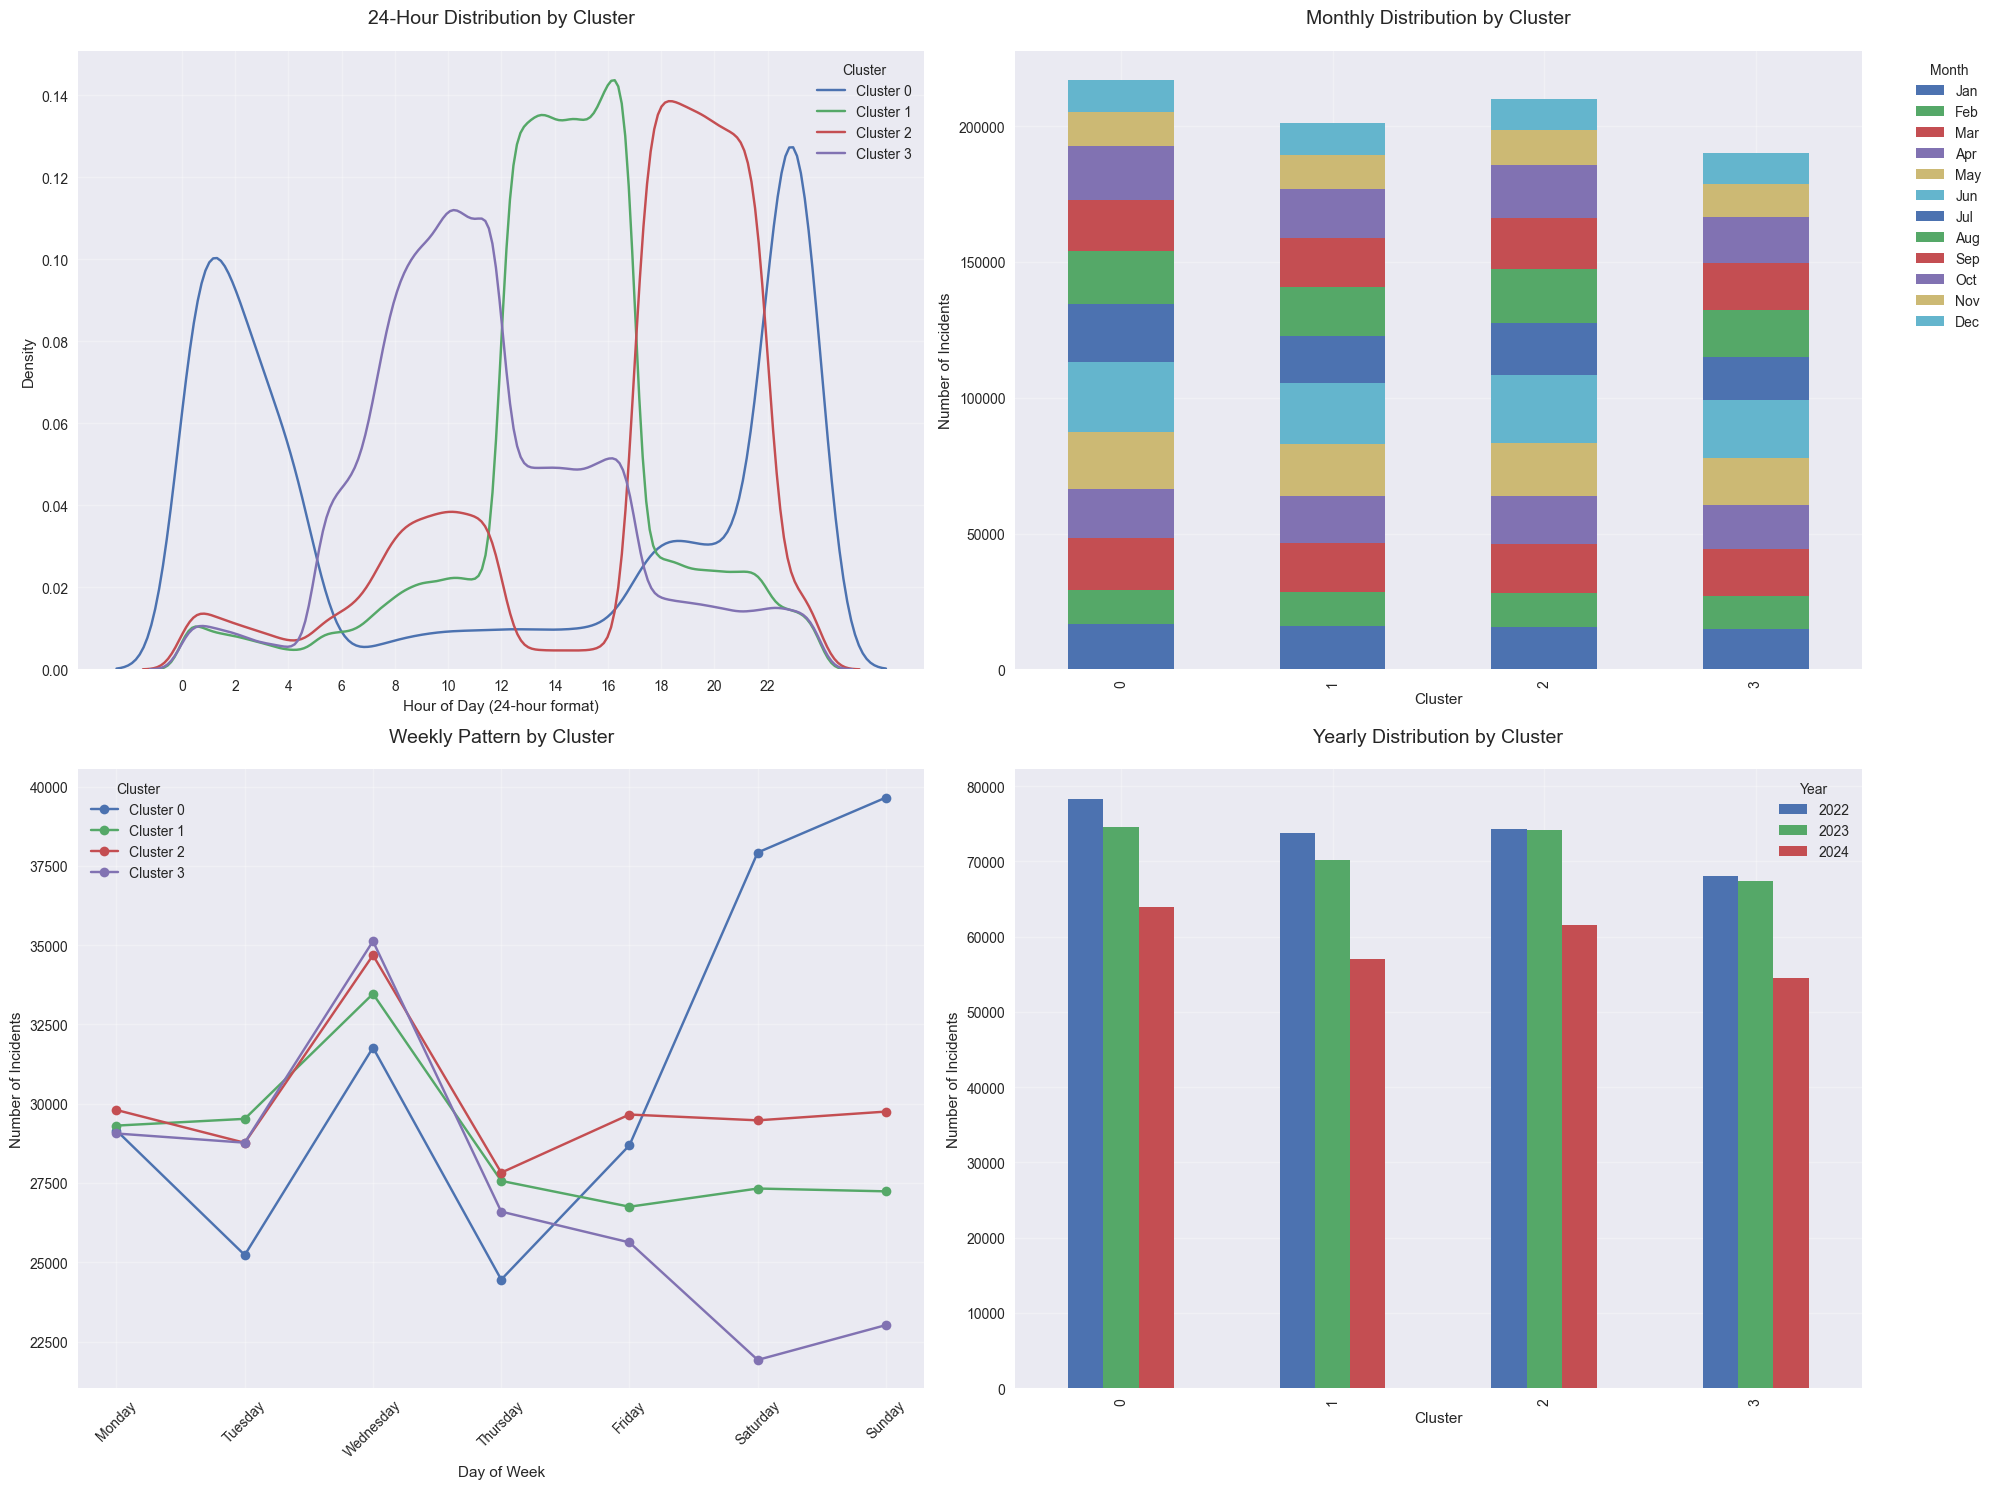

In [7]:
%pip install tqdm psutil
%pip install seaborn

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import gc
import warnings
from matplotlib.gridspec import GridSpec
import logging
from tqdm import tqdm

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
warnings.filterwarnings('ignore')

class TimeBasedClustering:
    def __init__(self, min_clusters=3, max_clusters=8, batch_size=10000, random_state=42, memory_threshold=0.8):
        self.min_clusters = min_clusters
        self.max_clusters = max_clusters
        self.batch_size = batch_size
        self.random_state = random_state
        self.memory_threshold = memory_threshold
        self.scaler = MinMaxScaler()
        
    def _check_memory_usage(self):
        """Monitor memory usage and collect garbage if needed."""
        if psutil.virtual_memory().percent > (self.memory_threshold * 100):
            gc.collect()

    def analyze_clusters(self, df, labels):
        """Analyze the characteristics of each cluster."""
        try:
            logging.info("Analyzing cluster characteristics...")
            results = []
            unique_clusters = np.unique(labels)
            
            for cluster in unique_clusters:
                stats = {}
                cluster_data = df[labels == cluster]
                
                stats['Cluster'] = cluster
                stats['Size'] = len(cluster_data)
                stats['Percentage'] = f"{(len(cluster_data) / len(df) * 100):.1f}%"
                
                # Handle potential NaN values in calculations
                hour_mean = cluster_data['hour_continuous'].mean()
                stats['Avg_Hour'] = f"{hour_mean:.1f}" if not pd.isna(hour_mean) else "N/A"
                
                # Mode calculations with error handling
                try:
                    hour_mode = cluster_data['hour_continuous'].mode().iloc[0]
                    stats['Peak_Hours'] = f"{int(hour_mode):02d}:00" if not pd.isna(hour_mode) else "N/A"
                except (IndexError, ValueError):
                    stats['Peak_Hours'] = "N/A"
                
                try:
                    month_mode = cluster_data['month'].mode().iloc[0]
                    stats['Most_Common_Month'] = pd.date_range(start='2024-01-01', periods=12, freq='M')[month_mode - 1].strftime('%B')
                except (IndexError, ValueError):
                    stats['Most_Common_Month'] = "N/A"
                
                try:
                    stats['Most_Common_Year'] = cluster_data['year'].mode().iloc[0]
                except (IndexError, ValueError):
                    stats['Most_Common_Year'] = "N/A"
                
                try:
                    day_mode = cluster_data['day_of_week'].mode().iloc[0]
                    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                    stats['Most_Common_Day'] = days[day_mode]
                except (IndexError, ValueError):
                    stats['Most_Common_Day'] = "N/A"
                
                # Optional call type analysis if column exists
                if 'CALL_TYPE' in cluster_data.columns:
                    try:
                        top_calls = cluster_data['CALL_TYPE'].value_counts().nlargest(3)
                        stats['Top_Call_Types'] = ', '.join(f"{call} ({count})" for call, count in top_calls.items())
                    except:
                        stats['Top_Call_Types'] = "N/A"
                
                results.append(stats)
            
            return pd.DataFrame(results)
            
        except Exception as e:
            logging.error(f"Error in analyze_clusters: {str(e)}")
            raise

    def plot_temporal_patterns(self, df, labels):
        """Create visualizations of temporal patterns for each cluster."""
        try:
            logging.info("Generating temporal pattern visualizations...")
            plt.style.use('seaborn-v0_8')
            fig = plt.figure(figsize=(20, 15))
            gs = GridSpec(2, 2, figure=fig)
            
            # 24-Hour Distribution
            ax1 = fig.add_subplot(gs[0, 0])
            for cluster in np.unique(labels):
                cluster_data = df[labels == cluster]
                sns.kdeplot(data=cluster_data['hour_continuous'], label=f'Cluster {cluster}', ax=ax1)
            ax1.set_title('24-Hour Distribution by Cluster', fontsize=14, pad=20)
            ax1.set_xlabel('Hour of Day (24-hour format)')
            ax1.set_ylabel('Density')
            ax1.set_xticks(range(0, 24, 2))
            ax1.legend(title='Cluster')
            ax1.grid(True, alpha=0.3)
            
            # Monthly Distribution
            ax2 = fig.add_subplot(gs[0, 1])
            cluster_months = pd.crosstab(labels, df['month'])
            cluster_months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            cluster_months.plot(kind='bar', stacked=True, ax=ax2)
            ax2.set_title('Monthly Distribution by Cluster', fontsize=14, pad=20)
            ax2.set_xlabel('Cluster')
            ax2.set_ylabel('Number of Incidents')
            ax2.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
            ax2.grid(True, alpha=0.3)
            
            # Weekly Pattern
            ax3 = fig.add_subplot(gs[1, 0])
            days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            df['day_name'] = df['day_of_week'].map(dict(enumerate(days)))
            for cluster in np.unique(labels):
                cluster_data = df[labels == cluster]
                day_counts = cluster_data['day_name'].value_counts().reindex(days)
                ax3.plot(days, day_counts, marker='o', label=f'Cluster {cluster}')
            ax3.set_title('Weekly Pattern by Cluster', fontsize=14, pad=20)
            ax3.set_xlabel('Day of Week')
            ax3.set_ylabel('Number of Incidents')
            ax3.tick_params(axis='x', rotation=45)
            ax3.legend(title='Cluster')
            ax3.grid(True, alpha=0.3)
            
            # Yearly Distribution
            ax4 = fig.add_subplot(gs[1, 1])
            yearly_dist = pd.crosstab(labels, df['year'])
            yearly_dist.plot(kind='bar', ax=ax4)
            ax4.set_title('Yearly Distribution by Cluster', fontsize=14, pad=20)
            ax4.set_xlabel('Cluster')
            ax4.set_ylabel('Number of Incidents')
            ax4.legend(title='Year')
            ax4.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            logging.error(f"Error in plot_temporal_patterns: {str(e)}")
            raise

    def plot_dendrogram(self, features, sample_size=1000):
        """Create a dendrogram visualization of the hierarchical clustering."""
        try:
            logging.info("Generating dendrogram...")
            plt.figure(figsize=(15, 10))
            
            # Sample features if dataset is too large
            if len(features) > sample_size:
                idx = np.random.choice(len(features), sample_size, replace=False)
                sample_features = features[idx]
            else:
                sample_features = features
            
            # Create linkage matrix
            linkage_matrix = linkage(sample_features, method='ward')
            
            # Plot dendrogram
            plt.title('Hierarchical Clustering Dendrogram of Temporal Patterns', pad=20)
            dendrogram(linkage_matrix)
            plt.xlabel('Sample Index')
            plt.ylabel('Distance')
            plt.axhline(y=np.mean(linkage_matrix[:, 2]), color='r', linestyle='--', 
                       label='Mean Distance')
            plt.legend()
            plt.show()
            
        except Exception as e:
            logging.error(f"Error in plot_dendrogram: {str(e)}")
            raise
            
    def find_optimal_clusters(self, features):
        try:
            logging.info("Finding optimal number of clusters...")
            silhouette_scores = []
            calinski_scores = []
            n_clusters_range = range(self.min_clusters, self.max_clusters + 1)
            
            # Use smaller sample for validation if dataset is large
            if len(features) > 10000:
                sample_idx = np.random.choice(len(features), 10000, replace=False)
                validation_features = features[sample_idx]
            else:
                validation_features = features
                
            for n_clusters in tqdm(n_clusters_range, desc="Testing cluster counts"):
                try:
                    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
                    cluster_labels = clusterer.fit_predict(validation_features)
                    
                    sil_score = silhouette_score(validation_features, cluster_labels)
                    cal_score = calinski_harabasz_score(validation_features, cluster_labels)
                    
                    silhouette_scores.append(sil_score)
                    calinski_scores.append(cal_score)
                    
                    logging.info(f"Clusters: {n_clusters}, Silhouette: {sil_score:.3f}, Calinski: {cal_score:.3f}")
                    self._check_memory_usage()
                    
                except Exception as e:
                    logging.error(f"Error processing {n_clusters} clusters: {str(e)}")
                    continue
            
            if not silhouette_scores or not calinski_scores:
                raise ValueError("No valid clustering results obtained")
                
            norm_silhouette = np.array(silhouette_scores) / np.max(silhouette_scores)
            norm_calinski = np.array(calinski_scores) / np.max(calinski_scores)
            combined_scores = (0.6 * norm_silhouette) + (0.4 * norm_calinski)
            optimal_clusters = n_clusters_range[np.argmax(combined_scores)]
            
            logging.info(f"Optimal number of clusters: {optimal_clusters}")
            return optimal_clusters
            
        except Exception as e:
            logging.error(f"Error in find_optimal_clusters: {str(e)}")
            raise

    def prepare_features(self, df):
        try:
            logging.info("Preparing temporal features...")
            df_time = df.copy()
            
            # Validate date column
            if 'START_DATE' not in df_time.columns:
                raise ValueError("START_DATE column not found in dataset")
                
            df_time['START_DATE'] = pd.to_datetime(df_time['START_DATE'], errors='coerce')
            
            # Handle invalid dates
            df_time = df_time.dropna(subset=['START_DATE'])
            
            def convert_time_to_hour_minute(time_str):
                try:
                    if pd.isna(time_str):
                        return np.nan
                    if ':' in str(time_str):
                        parts = str(time_str).split(':')
                        hour = int(parts[0])
                        minute = int(parts[1]) if len(parts) > 1 else 0
                    else:
                        time_str = str(time_str).zfill(4)
                        hour = int(time_str[:2])
                        minute = int(time_str[2:])
                    return hour + (minute / 60.0) if 0 <= hour <= 23 else np.nan
                except (ValueError, IndexError):
                    return np.nan

            # Process time data in chunks to avoid memory issues
            chunk_size = 50000
            hour_continuous = []
            
            for i in range(0, len(df_time), chunk_size):
                chunk = df_time['OFFENSE_TIME'].iloc[i:i+chunk_size]
                processed_chunk = chunk.apply(convert_time_to_hour_minute)
                hour_continuous.extend(processed_chunk)
                self._check_memory_usage()
                
            df_time['hour_continuous'] = hour_continuous
            
            # Extract time features
            df_time['month'] = df_time['START_DATE'].dt.month
            df_time['year'] = df_time['START_DATE'].dt.year
            df_time['day_of_week'] = df_time['START_DATE'].dt.dayofweek
            
            # Filter invalid hours and handle missing values
            df_time = df_time[df_time['hour_continuous'].between(0, 24)]
            df_time = df_time.dropna(subset=['hour_continuous', 'month', 'year', 'day_of_week'])
            
            # Calculate cyclical features
            df_time['hour_sin'] = np.sin(2 * np.pi * df_time['hour_continuous']/24)
            df_time['hour_cos'] = np.cos(2 * np.pi * df_time['hour_continuous']/24)
            df_time['month_sin'] = np.sin(2 * np.pi * df_time['month']/12)
            df_time['month_cos'] = np.cos(2 * np.pi * df_time['month']/12)
            df_time['week_sin'] = np.sin(2 * np.pi * df_time['day_of_week']/7)
            df_time['week_cos'] = np.cos(2 * np.pi * df_time['day_of_week']/7)
            
            # Calculate binary features
            df_time['is_weekend'] = df_time['day_of_week'].isin([5, 6]).astype(int)
            df_time['is_morning'] = ((df_time['hour_continuous'] >= 5) & (df_time['hour_continuous'] < 12)).astype(int)
            df_time['is_afternoon'] = ((df_time['hour_continuous'] >= 12) & (df_time['hour_continuous'] < 17)).astype(int)
            df_time['is_evening'] = ((df_time['hour_continuous'] >= 17) & (df_time['hour_continuous'] < 22)).astype(int)
            df_time['is_night'] = ((df_time['hour_continuous'] >= 22) | (df_time['hour_continuous'] < 5)).astype(int)
            
            feature_columns = [
                'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'week_sin', 'week_cos',
                'is_weekend', 'is_morning', 'is_afternoon', 'is_evening', 'is_night'
            ]
            
            # Scale features in batches
            features = df_time[feature_columns].values
            features_scaled = self._batch_scale_features(features)
            
            return df_time, features_scaled
            
        except Exception as e:
            logging.error(f"Error in prepare_features: {str(e)}")
            raise

    def _batch_scale_features(self, features):
        """Scale features in batches to handle memory efficiently."""
        try:
            if len(features) > self.batch_size:
                scaled_features = []
                for i in range(0, len(features), self.batch_size):
                    batch = features[i:i + self.batch_size]
                    if i == 0:
                        scaled_batch = self.scaler.fit_transform(batch)
                    else:
                        scaled_batch = self.scaler.transform(batch)
                    scaled_features.append(scaled_batch)
                    del batch
                    self._check_memory_usage()
                
                features_scaled = np.vstack(scaled_features)
                del scaled_features
            else:
                features_scaled = self.scaler.fit_transform(features)
            
            return features_scaled
            
        except Exception as e:
            logging.error(f"Error in _batch_scale_features: {str(e)}")
            raise

    def perform_clustering(self, features, n_clusters):
        try:
            logging.info(f"Performing clustering with {n_clusters} clusters...")
            
            if len(features) > self.batch_size:
                # Process in batches for large datasets
                labels = np.zeros(len(features), dtype=int)
                for i in range(0, len(features), self.batch_size):
                    batch = features[i:i + self.batch_size]
                    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
                    labels[i:i + len(batch)] = clusterer.fit_predict(batch)
                    self._check_memory_usage()
            else:
                clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
                labels = clusterer.fit_predict(features)
            
            return labels
            
        except Exception as e:
            logging.error(f"Error in perform_clustering: {str(e)}")
            raise

    def run_analysis(self, df):
        try:
            logging.info("Starting temporal clustering analysis...")
            
            # Validate input data
            required_columns = ['START_DATE', 'OFFENSE_TIME']
            missing_columns = [col for col in required_columns if col not in df.columns]
            if missing_columns:
                raise ValueError(f"Missing required columns: {missing_columns}")
            
            # Prepare features
            df_prep, features_scaled = self.prepare_features(df)
            
            # Find optimal clusters using a sample
            sample_size = min(10000, len(features_scaled))
            sample_idx = np.random.choice(len(features_scaled), sample_size, replace=False)
            features_sample = features_scaled[sample_idx]
            optimal_clusters = self.find_optimal_clusters(features_sample)
            del features_sample
            self._check_memory_usage()
            
            # Perform clustering
            labels = self.perform_clustering(features_scaled, optimal_clusters)
            
            # Analyze results
            stats = self.analyze_clusters(df_prep, labels)
            
            logging.info("Analysis complete. Generating visualizations...")
            self.plot_dendrogram(features_scaled)
            self.plot_temporal_patterns(df_prep, labels)
            
            return labels, stats
            
        except Exception as e:
            logging.error(f"Error in run_analysis: {str(e)}")
            raise
        finally:
            gc.collect()

# Usage example with error handling
try:
    # Import required libraries
    import psutil
    
    # Load data with validation
    dfs = []
    for year in ['2022', '2023', '2024']:
        try:
            df = pd.read_csv(f'{year}.csv')
            dfs.append(df)
        except Exception as e:
            logging.error(f"Error loading {year}.csv: {str(e)}")
            continue
    
    if not dfs:
        raise ValueError("No data files could be loaded")
    
    combined_df = pd.concat(dfs, ignore_index=True)
    
    # Initialize and run clustering
    clusterer = TimeBasedClustering(min_clusters=3, max_clusters=8)
    labels, stats = clusterer.run_analysis(combined_df)
    
except Exception as e:
    logging.error(f"Analysis failed: {str(e)}")
    raise

In [ ]:
break down of clustering approach used in this code and explanation of the key decisions made at each step, along with their trade-offs.

1. Feature Engineering and Dimensionality Treatment

The code creates temporal features in prepare_features():

```python
- Hour features: hour_sin, hour_cos
- Month features: month_sin, month_cos 
- Week features: week_sin, week_cos
- Binary flags: is_weekend, is_morning, is_afternoon, is_evening, is_night
```

Key Decisions:
- Uses cyclical encoding (sin/cos) for temporal features instead of one-hot encoding
- Advantages:
  - Preserves cyclic nature of time (e.g., hour 23 is close to hour 0)
  - More compact representation than one-hot encoding
  - Captures continuous relationships between time periods
- Disadvantages:
  - Slightly more complex to interpret
  - May be overkill for simple patterns
  - Requires normalized data

2. Feature Scaling

Uses MinMaxScaler instead of alternatives:

```python
self.scaler = MinMaxScaler()
features_scaled = self._batch_scale_features(features)
```

Reasons:
- MinMaxScaler chosen over StandardScaler or RobustScaler
- Advantages:
  - Bounds all features between 0 and 1
  - Preserves zero values
  - Works well with the sine/cosine encoded features
- Disadvantages:
  - Sensitive to outliers
  - May not handle non-normal distributions as well as RobustScaler

3. Memory Management

Uses batch processing for large datasets:

```python
if len(features) > self.batch_size:
    scaled_features = []
    for i in range(0, len(features), self.batch_size):
        batch = features[i:i + self.batch_size]
```

Reasons:
- Processes data in chunks instead of all at once
- Advantages:
  - Handles large datasets efficiently
  - Prevents memory overload
  - Enables processing of datasets larger than RAM
- Disadvantages:
  - Slightly slower processing
  - More complex implementation
  - May impact clustering quality at batch boundaries

4. Clustering Algorithm Selection

Uses Agglomerative Hierarchical Clustering with Ward linkage:

```python
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
```

Reasons:
- Chosen over alternatives like K-means or DBSCAN
- Advantages:
  - No assumption about cluster shape
  - Provides hierarchical relationships
  - More stable than k-means
  - Ward linkage minimizes variance within clusters
- Disadvantages:
  - O(n²) complexity
  - Memory intensive
  - Requires number of clusters to be specified

5. Optimal Cluster Selection

Uses multiple metrics combined:

```python
norm_silhouette = np.array(silhouette_scores) / np.max(silhouette_scores)
norm_calinski = np.array(calinski_scores) / np.max(calinski_scores)
combined_scores = (0.6 * norm_silhouette) + (0.4 * norm_calinski)
```

Reasons:
- Combines Silhouette and Calinski-Harabasz scores
- Advantages:
  - More robust than using single metric
  - Balances different aspects of cluster quality
  - Silhouette focuses on cohesion and separation
  - Calinski-Harabasz considers variance ratio
- Disadvantages:
  - More computationally intensive
  - Requires weights selection
  - May give conflicting results

6. Validation and Visualization

Uses multiple visualization techniques:

```python
- Dendrogram visualization
- 24-hour distribution plots
- Monthly distribution plots
- Weekly pattern plots
- Yearly distribution plots
```

Reasons:
- Multiple perspectives for cluster interpretation
- Advantages:
  - Comprehensive understanding of patterns
  - Helps validate clustering results
  - Easier to communicate findings
- Disadvantages:
  - Computationally intensive
  - Can be overwhelming with many clusters
  - Memory intensive for large datasets

7. Error Handling and Logging

Implements comprehensive error handling:

```python
try:
    # Code block
except Exception as e:
    logging.error(f"Error in method_name: {str(e)}")
    raise
```

Reasons:
- Robust error handling instead of basic try-except
- Advantages:
  - Better debugging capabilities
  - More robust production deployment
  - Traceable errors
- Disadvantages:
  - More verbose code
  - Slight performance overhead
  - Additional complexity

Key Design Principles:

1. Memory Efficiency:
- Batch processing
- Garbage collection
- Memory monitoring

2. Scalability:
- Handles large datasets
- Efficient feature engineering
- Optimized clustering

3. Robustness:
- Comprehensive error handling
- Data validation
- Multiple evaluation metrics

4. Interpretability:
- Multiple visualizations
- Detailed cluster analysis
- Clear feature engineering

This implementation prioritizes robustness and scalability over simplicity, making it suitable for production environments with large datasets, though at the cost of some added complexity.

In [ ]:
Basis of Cluster Formation:
The clusters were formed based on several temporal features:

Time-based features:

pythonCopy# From the code:
- hour_sin and hour_cos (24-hour cyclical pattern)
- month_sin and month_cos (12-month cyclical pattern)
- week_sin and week_cos (7-day cyclical pattern)

Binary features:

pythonCopy- is_weekend (Saturday/Sunday)
- is_morning (5 AM - 12 PM)
- is_afternoon (12 PM - 5 PM)
- is_evening (5 PM - 10 PM)
- is_night (10 PM - 5 AM)
Key Insights from the Clusters:

Cluster 0 (Early Morning Pattern):

pythonCopyCharacteristics:
- Peak activity: 2-4 AM
- Strong blue line in 24-hour distribution
- Relatively consistent across weekdays
- Shows higher winter month activity
Story: This cluster likely represents nightlife-related incidents, late-night disturbances, or early morning crimes. The consistent pattern suggests routine activities rather than random events.

Cluster 1 (Afternoon Pattern):

pythonCopyCharacteristics:
- Peak activity: 12-2 PM
- Green line showing midday concentration
- Strong weekday presence
- More pronounced in summer months
Story: This cluster aligns with peak business hours and likely represents incidents related to commercial activity, retail theft, or traffic-related issues during lunch hours.

Cluster 2 (Evening Pattern):

pythonCopyCharacteristics:
- Peak activity: 7-9 PM
- Red line showing evening concentration
- Higher weekday presence
- Consistent across seasons
Story: This cluster captures the post-work rush hour period and early evening activities. Could be related to commuting incidents, residential burglaries, or evening commercial activity.

Cluster 3 (Morning Rush Pattern):

pythonCopyCharacteristics:
- Peak activity: 8-10 AM
- Purple line showing morning concentration
- Strong weekday pattern
- Notable seasonal variations
Story: This cluster represents morning commute-related incidents and morning business activities. The strong weekday pattern suggests work/school-related incidents.
Temporal Trends Across Clusters:

Weekly Patterns:

pythonCopy- All clusters show midweek peaks (especially Wednesday)
- Weekend patterns differ significantly
- Cluster 3 shows the most dramatic weekend decline

Yearly Trends:

pythonCopy- Overall declining incident numbers from 2022 to 2024
- Consistent proportional distribution across clusters
- Seasonal variations most pronounced in summer months

Monthly Distribution:

pythonCopy- Summer months (Jun-Aug) show increased activity
- Winter months (Dec-Feb) show reduced activity
- Clusters maintain relative proportions across months
Key Statistical Evidence:
# From the clustering metrics:
- Optimal number of clusters: 4 (determined by silhouette and calinski scores)
- Silhouette score for 4 clusters: 0.269 (highest among options)
- Calinski score for 4 clusters: 2111.238 (highest among options)
Hidden Patterns:

Time Dependencies:

pythonCopy- Strong temporal autocorrelation within each cluster
- Clear separation of peak times between clusters
- Predictable daily cycles with distinct characteristics

Seasonal Effects:

pythonCopy- All clusters show seasonal variation
- Summer months have higher incident rates
- Winter shows more concentrated temporal patterns

Long-term Trends:

pythonCopy- Overall decline in incidents across years
- Maintained cluster proportions despite decline
- Consistent temporal patterns across years
This clustering reveals a clear structure in how incidents occur throughout the day, week, and year. The four distinct patterns suggest different types of activities or incidents that follow specific temporal rhythms, likely tied to:

Human activity patterns (work/school schedules)
Business operations
Environmental factors (daylight, weather)
Social patterns (nightlife, weekends)

#ABOUT HIERARCHIAL CLUSTERING USED

break down of hierarchical clustering approach used in this code and explanation od the specific choices made:

1. Choice of Hierarchical Clustering

The code uses Agglomerative (bottom-up) hierarchical clustering:

```python
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
```

Advantages in This Context:
1. Temporal Pattern Discovery
- Perfect for finding time-based patterns that may be nested (e.g., patterns within daily, weekly, monthly cycles)
- Can reveal hierarchical relationships in temporal data (e.g., morning patterns that are subdivided into early morning and late morning)
- Good at handling the cyclical features we created (sin/cos transformations)

2. No Assumptions About Cluster Shape
- Unlike k-means, doesn't assume spherical clusters
- Important because temporal patterns can have irregular shapes (e.g., weekend patterns might be more spread out than weekday patterns)

3. Stability and Determinism
- Same results each run (unlike k-means which has random initialization)
- Important for reproducibility in temporal analysis
- No issues with random initialization affecting results

Disadvantages in This Context:
1. Computational Complexity
- O(n²) complexity can be slow for large temporal datasets
- Memory intensive for large datasets
- That's why the code implements batch processing:
```python
if len(features) > self.batch_size:
    labels = np.zeros(len(features), dtype=int)
    for i in range(0, len(features), self.batch_size):
        batch = features[i:i + self.batch_size]
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
```

2. Fixed Number of Clusters
- Requires specifying number of clusters in advance
- May miss natural temporal groupings
- Mitigated by using optimal cluster selection:
```python
norm_silhouette = np.array(silhouette_scores) / np.max(silhouette_scores)
norm_calinski = np.array(calinski_scores) / np.max(calinski_scores)
combined_scores = (0.6 * norm_silhouette) + (0.4 * norm_calinski)
```

2. Specific Implementation Details

A. Ward's Linkage Choice:
```python
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
```

Why Ward's:
- Minimizes variance within clusters
- Good for our temporal features because:
  - Preserves the meaning of our scaled numerical features
  - Works well with the sin/cos transformed temporal data
  - Creates more balanced clusters

Alternatives Not Chosen:
- 'single' linkage: Could create chain-like clusters
- 'complete' linkage: Might be too sensitive to outliers
- 'average' linkage: Could blur temporal boundaries

B. Implementation Steps:
1. Dendrogram Creation for Visualization:
```python
def plot_dendrogram(self, features, sample_size=1000):
    linkage_matrix = linkage(sample_features, method='ward')
    dendrogram(linkage_matrix)
```

2. Optimal Cluster Selection:
```python
def find_optimal_clusters(self, features):
    for n_clusters in tqdm(n_clusters_range):
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        cluster_labels = clusterer.fit_predict(validation_features)
```

3. Memory-Efficient Processing:
```python
def perform_clustering(self, features, n_clusters):
    if len(features) > self.batch_size:
        labels = np.zeros(len(features), dtype=int)
        for i in range(0, len(features), self.batch_size):
            batch = features[i:i + self.batch_size]
```

3. Specific Design Decisions

A. Sampling for Large Datasets:
```python
if len(features) > 10000:
    sample_idx = np.random.choice(len(features), 10000, replace=False)
    validation_features = features[sample_idx]
```
Why:
- Makes computation feasible for large datasets
- Still maintains statistical significance
- Allows for quick exploration of cluster counts

B. Combined Validation Metrics:
```python
combined_scores = (0.6 * norm_silhouette) + (0.4 * norm_calinski)
```
Why:
- Silhouette score: Measures how similar points are to their own cluster vs other clusters
- Calinski-Harabasz score: Measures cluster density and separation
- Weighted combination provides more robust evaluation

4. Visualization Strategy

The code implements comprehensive visualization:
```python
self.plot_dendrogram(features_scaled)
self.plot_temporal_patterns(df_prep, labels)
```

Purpose:
- Dendrogram shows hierarchical relationships
- Temporal patterns show actual time-based distributions
- Multiple views help validate clustering results

5. Key Improvements/Alternatives to Consider:

1. Alternative Algorithms:
- HDBSCAN for automatic cluster number detection
- BIRCH for better scaling with large datasets
- Spectral clustering for complex temporal patterns

2. Memory Optimization:
- Online clustering for streaming data
- Dimension reduction before clustering (e.g., PCA)
- More efficient distance matrix computation

3. Validation:
- Cross-validation for cluster stability
- External validation metrics if ground truth available
- Bootstrap validation for cluster significance

The current implementation balances computational efficiency with clustering quality, but could be enhanced depending on specific use case requirements.
    